# **<h3>Algorithms, Pre-Processing, Evaluation Metrics and Results<h3>** 

In [1]:
%pip install pandas matplotlib seaborn wordcloud squarify scikit-learn 

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# 2. Country-wise AI Impact on Job Loss

In [2]:
# Load data
data = pd.read_csv("../Global_AI_Content_Impact_Dataset.csv")

Mean Job Loss Due to AI (%): 25.788249999999998

=== Evaluation Metrics Summary ===
                     Accuracy  Precision    Recall  F1 Score
Model                                                       
Logistic Regression  0.533333   0.518519  0.482759   0.50000
Random Forest        0.516667   0.500000  0.551724   0.52459
KNN (k=3)            0.450000   0.423077  0.379310   0.40000
Classification reports have been saved to classification_reports.log


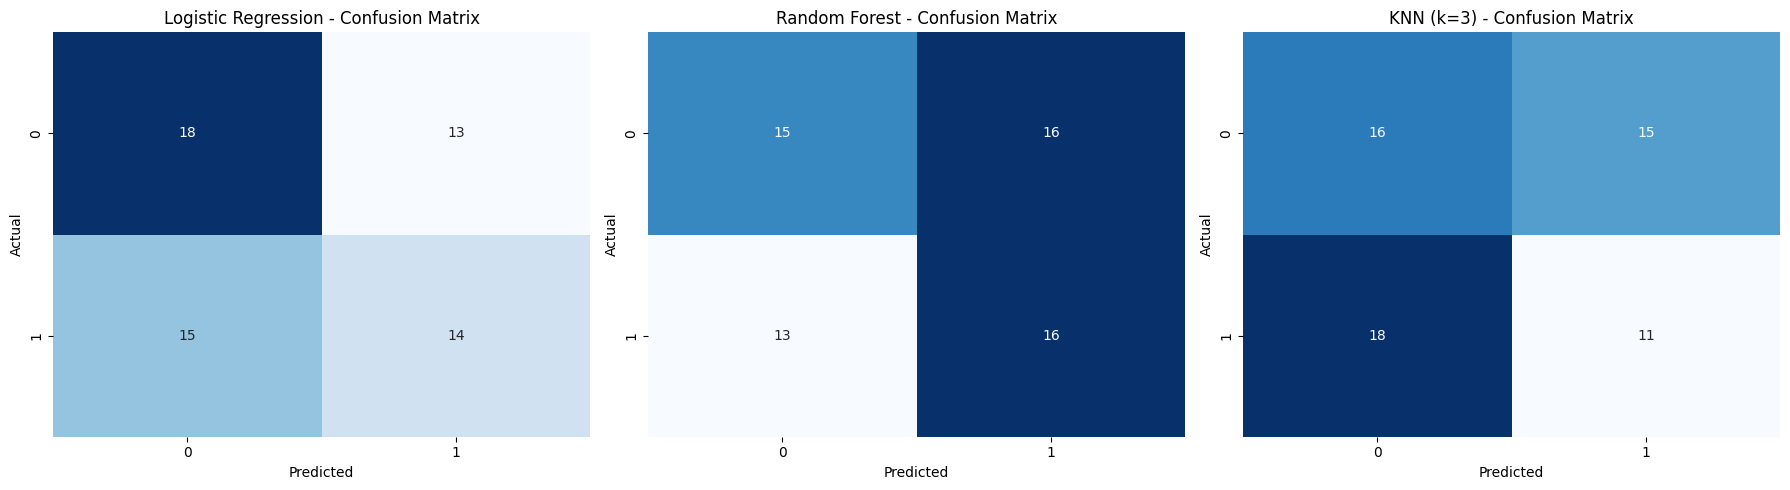

<Figure size 1200x600 with 0 Axes>

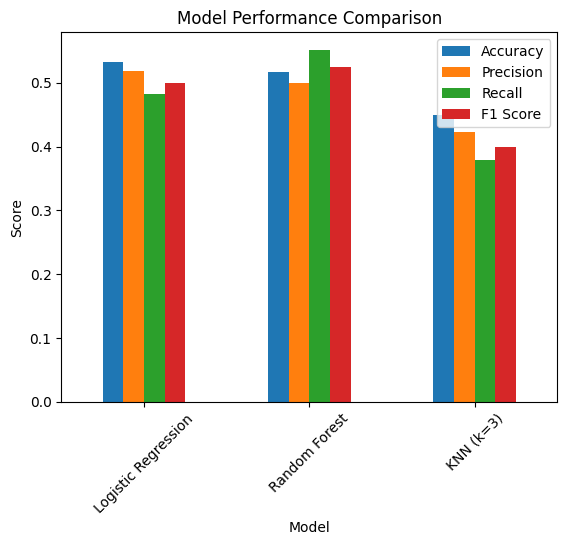


=== Overall Model Performance Sorted by F1 Score ===
                     Accuracy  Precision    Recall  F1 Score
Model                                                       
Random Forest        0.516667   0.500000  0.551724   0.52459
Logistic Regression  0.533333   0.518519  0.482759   0.50000
KNN (k=3)            0.450000   0.423077  0.379310   0.40000


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


mean_job_loss = data['Job Loss Due to AI (%)'].mean()
print("Mean Job Loss Due to AI (%):", mean_job_loss)

data['Job Loss Binary'] = (data['Job Loss Due to AI (%)'] > mean_job_loss).astype(int)

X = data[['Country', 'Year', 'Industry', 'AI Adoption Rate (%)', 
        'AI-Generated Content Volume (TBs per year)', 'Revenue Increase Due to AI (%)', 
        'Human-AI Collaboration Rate (%)', 'Consumer Trust in AI (%)', 
        'Market Share of AI Companies (%)', 'Regulation Status']]
y = data['Job Loss Binary']

categorical_features = ['Country', 'Industry', 'Regulation Status']
numerical_features = ['Year', 'AI Adoption Rate (%)', 'AI-Generated Content Volume (TBs per year)',
                    'Revenue Increase Due to AI (%)', 'Human-AI Collaboration Rate (%)',
                    'Consumer Trust in AI (%)', 'Market Share of AI Companies (%)']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, max_depth=3),
    'KNN (k=3)': KNeighborsClassifier(n_neighbors=3)
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

results = []
classification_reports = {}
confusion_matrices = []
fitted_pipelines = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    fitted_pipelines[name] = pipeline  # Save pipeline
    y_pred = pipeline.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append((name, cm))
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append((name, accuracy, precision, recall, f1))
    
    cr = classification_report(y_test, y_pred, output_dict=True)
    classification_reports[name] = cr
    
    # print("\nClassification Report:")
    # print(classification_report(y_test, y_pred))

# --- 1. Evaluation Metrics Table ---
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_df.set_index('Model', inplace=True)
print("\n=== Evaluation Metrics Summary ===")
print(results_df)

# --- 2. Print All Classification Reports ---
# print("\n=== Classification Reports ===")
# for model_name, pipeline in fitted_pipelines.items():
#     y_pred = pipeline.predict(X_test)
#     print(f"\n{model_name}:\n")
#     print(classification_report(y_test, y_pred))

log_file_path = 'classification_reports.log'

with open(log_file_path, 'w') as log_file:
    log_file.write("\n=== Classification Reports ===\n")
    for model_name, pipeline in fitted_pipelines.items():
        y_pred = pipeline.predict(X_test)
        report = classification_report(y_test, y_pred)
        
        log_file.write(f"\n{model_name}:\n\n")
        log_file.write(report)
        log_file.write("\n" + "="*50 + "\n")  # Separator between reports

print(f"Classification reports have been saved to {log_file_path}")
    
    
# --- 4. Plot Confusion Matrices Side by Side ---
fig, axes = plt.subplots(1, len(confusion_matrices), figsize=(18, 5))
for ax, (name, cm) in zip(axes, confusion_matrices):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f'{name} - Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()

# --- 5. Model Comparison Bar Chart ---
plt.figure(figsize=(12, 6))
results_df.plot(kind='bar', rot=0)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

# --- 6. Overall Model Performance Sorted by F1 ---
print('\n=== Overall Model Performance Sorted by F1 Score ===')
print(results_df.sort_values(by='F1 Score', ascending=False))


Among the three models evaluated, Random Forest performed the best overall. It achieved the highest F1 Score, indicating a good balance between precision and recall, and the highest recall, meaning it identified more true positive cases. Although Logistic Regression had slightly better accuracy, its lower recall and F1 Score suggest it was less effective at capturing positive instances. KNN showed the poorest performance across all metrics. Therefore, Random Forest is the most suitable model for this dataset based on these evaluation metrics.